# UNIT I — Notebook 2: Missing Values & Data Quality Engineering

## Objective of this Notebook

Real-world datasets are incomplete.
Before scaling, normalization, or modeling, we must:

1. Detect missing values
2. Understand their pattern
3. Decide whether to drop or impute
4. Choose an imputation strategy scientifically

⚠️ No model training in this notebook.

## 1. Reload Dataset (Clean State)

Rule:
Each notebook must be executable independently.
Never rely on previous notebook variables.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

# Update path if needed
path = "healthcare-dataset-stroke-data.csv"
df = pd.read_csv(path)

TARGET_COL = "stroke"
df.shape

(5110, 12)

## 2. Identify Missing Values

We first **measure** missingness.
What we don’t measure, we can’t justify fixing.


In [2]:
missing_count = df.isna().sum()
missing_percent = (missing_count / len(df) * 100).round(2)

missing_table = pd.DataFrame({
    "missing_count": missing_count,
    "missing_percent": missing_percent
}).sort_values(by="missing_percent", ascending=False)

missing_table[missing_table["missing_count"] > 0]


,missing_count,missing_percent
bmi,201,3.93


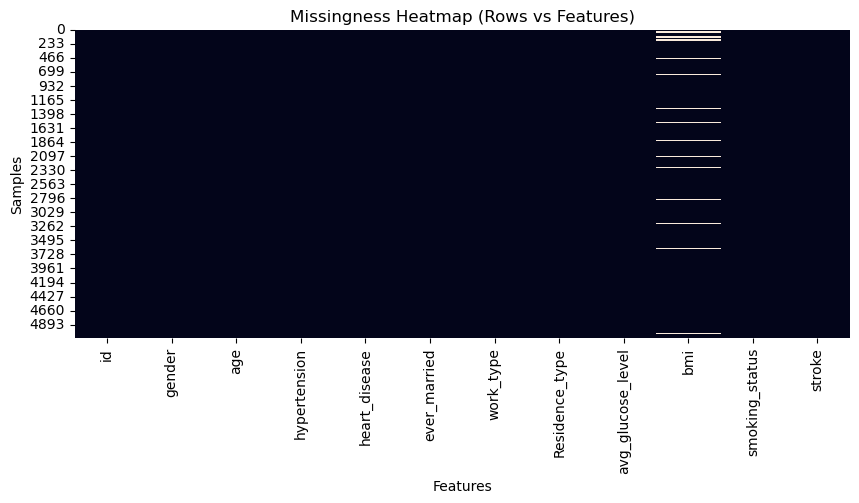

In [3]:
# Heatmap for missingness structure
plt.figure(figsize=(10,4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missingness Heatmap (Rows vs Features)")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.show()


## 4. Drop vs Impute — Decision Framework (No Action Yet)

General guideline:
- < 5% missing → usually safe to impute
- 5–30% missing → impute carefully, justify
- > 30% missing → consider dropping feature

⚠️ Do NOT apply yet.
We only identify candidates here.


## 5. Numeric Features — Distribution Before Imputation

Before choosing mean or median,
we must inspect the distribution.

Why?
- Mean is sensitive to outliers
- Median is robust to skewed data


In [4]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols


['id',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'stroke']

In [5]:
# Pick one numeric column with missing values (edit if needed)
num_col = None
for col in numeric_cols:
    if df[col].isna().sum() > 0:
        num_col = col
        break

num_col


'bmi'

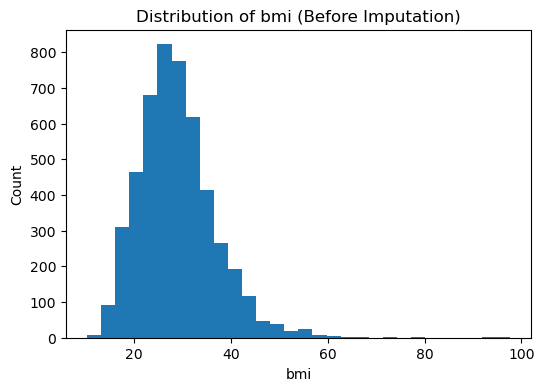

Mean: 28.89
Median: 28.1
Max: 97.6


In [6]:
# Distribution plot (before imputation)
plt.figure(figsize=(6,4))
plt.hist(df[num_col].dropna(), bins=30)
plt.title(f"Distribution of {num_col} (Before Imputation)")
plt.xlabel(num_col)
plt.ylabel("Count")
plt.show()

print("Mean:", round(df[num_col].mean(), 2))
print("Median:", round(df[num_col].median(), 2))
print("Max:", round(df[num_col].max(), 2))


## 6. Demonstration: Median Imputation (Non-destructive)

Rules:
- Never overwrite original column
- Always preserve raw data


In [7]:
median_value = df[num_col].median()
df[f"{num_col}_imputed"] = df[num_col].fillna(median_value)

print("Missing before:", df[num_col].isna().sum())
print("Missing after:", df[f"{num_col}_imputed"].isna().sum())


Missing before: 201
Missing after: 0


## 7. Validate Imputation Visually

If the shape changes drastically,

the imputation choice is wrong.


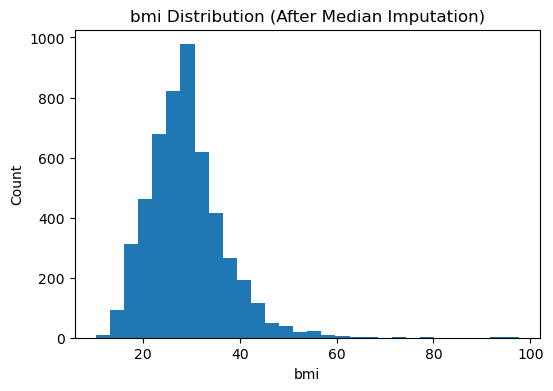

In [8]:
plt.figure(figsize=(6,4))
plt.hist(df[f"{num_col}_imputed"], bins=30)
plt.title(f"{num_col} Distribution (After Median Imputation)")
plt.xlabel(num_col)
plt.ylabel("Count")
plt.show()


## 8. Does Missingness Itself Matter?

Sometimes, missing values are informative.

We test this by creating a missingness indicator.


In [9]:
df[f"{num_col}_missing_flag"] = df[num_col].isna().astype(int)

(df.groupby(f"{num_col}_missing_flag")[TARGET_COL]
   .mean()
   .mul(100)
   .round(2))


bmi_missing_flag
0     4.26
1    19.90
Name: stroke, dtype: float64

## 9. Categorical Missing Values

For categorical data:
- Missing often means "Unknown"
- Mode imputation may hide meaning

Strategy:
- Replace NaN with explicit "Unknown"


In [10]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
cat_cols


['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [11]:
for col in cat_cols:
    df[col] = df[col].fillna("Unknown")

df[cat_cols].isna().sum()


gender            0
ever_married      0
work_type         0
Residence_type    0
smoking_status    0
dtype: int64

## 10. What We Did NOT Do (By Design)

❌ Scaling  
❌ Normalization  
❌ Outlier removal  
❌ Transformations  
❌ Feature selection  

These require understanding **distribution shape**,
which comes next.


## 11. Notebook 2 Summary

We have:
- Measured missingness
- Visualized missing patterns
- Demonstrated safe imputation
- Preserved raw data
- Created missingness indicators

The dataset is cleaner,
but **distribution analysis is pending**.
